In [53]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key

In [54]:
# US Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual
hydroelectric_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTCBUS.A"

In [55]:
print(requests.get(hydroelectric_url))

<Response [200]>


In [56]:
response = requests.get(hydroelectric_url).json()

In [57]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [58]:
# Create lists to determine x and y axis for graphs
years = []
hydroelectric_consumption = []

# Loop through Hydroelectric data API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    hydroelectric_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
hydroelectric = hydroelectric_consumption[::-1]

In [59]:
# Determine year to year percent change
hydroelectric_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Hydroelectric': hydroelectric_consumption[0:31],
    '% Change': hydroelectric_consumption[0:31]
})
hydroelectric_consumption_btu_df.head()

,Years,Hydroelectric,% Change
0,1990,2.601386,2.601386
1,1991,2.461102,2.461102
2,1992,2.675358,2.675358
3,1993,2.766969,2.766969
4,1994,2.472442,2.472442


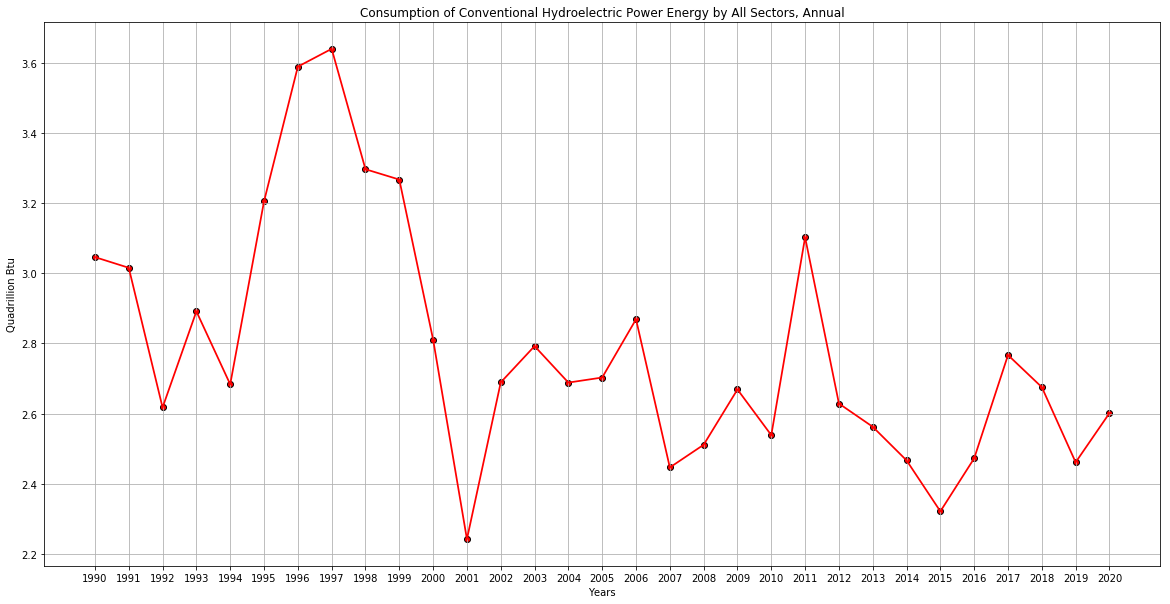

In [60]:
# US Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, hydroelectric, color="red", edgecolors="black")
plt.plot(years, hydroelectric, linewidth=1.75, color="red")
plt.title("Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual")
plt.ylabel("Quadrillion Btu")
plt.xlabel("Years")
plt.grid(True)

plt.show()

In [61]:
# US Consumption of Geothermal Energy by All Sectors, Annual
geothermal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GETCBUS.A"

In [62]:
print(requests.get(geothermal_url))

<Response [200]>


In [63]:
response = requests.get(geothermal_url).json()

In [64]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [65]:
# US Consumption of Geothermal Energy by All Sectors, Annual
# Create lists to determine x and y axis for graphs
years = []
geothermal_consumption = []

# Loop through Geothermal API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    geothermal_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
geothermal = geothermal_consumption[::-1]

In [94]:
# Determine year to year percent change
geothermal_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Geothermal (Quads)': geothermal_consumption[0:31],
    '% Change': geothermal_consumption[0:31]
})
geothermal_consumption_btu_df.head()

,Years,Geothermal (Quads),% Change
0,1990,0.231220,0.231220
1,1991,0.229400,0.229400
2,1992,0.218939,0.218939
3,1993,0.210233,0.210233
4,1994,0.209604,0.209604


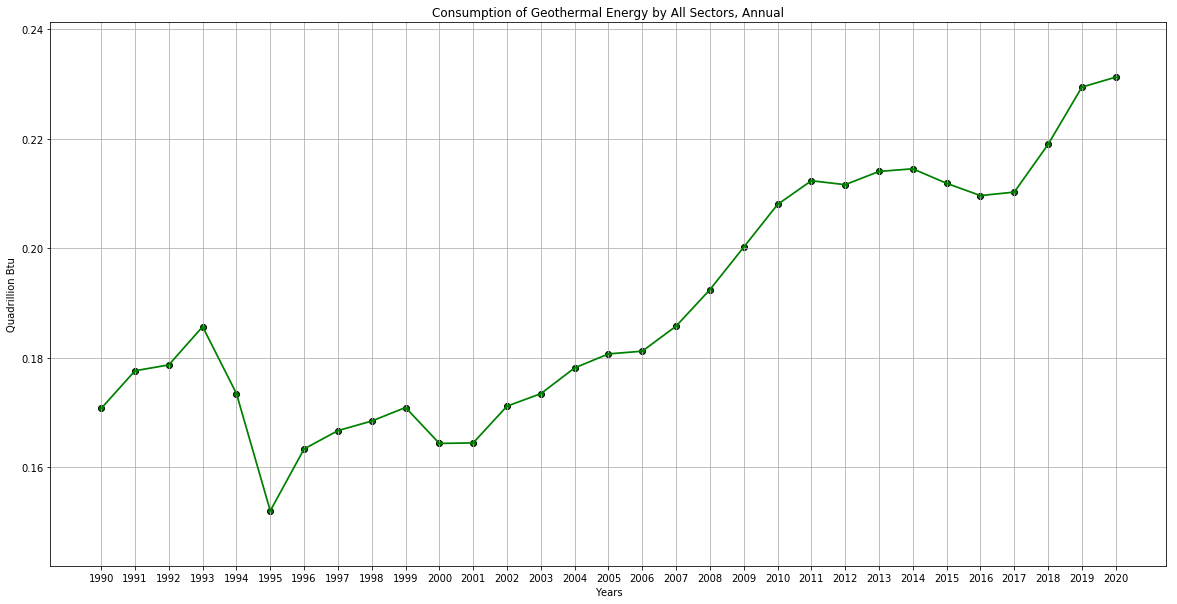

In [67]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(years, geothermal, color="green", edgecolors="black")
plt.plot(years, geothermal, color="green", linewidth=1.75)
plt.title("Consumption of Geothermal Energy by All Sectors, Annual")
plt.ylabel("Quadrillion Btu")
plt.xlabel("Years")
plt.grid(True)

plt.show()

In [68]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
solar_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOTCBUS.A"

In [69]:
print(requests.get(solar_url))

<Response [200]>


In [70]:
response = requests.get(solar_url).json()

In [71]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [72]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
solar_consumption = []

# Loop through Solar API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    solar_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
solar = solar_consumption[::-1]

In [95]:
# Determine year to year percent change
solar_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Solar (Quads)': solar_consumption[0:31],
    '% Change': solar_consumption[0:31]
})
solar_consumption_btu_df.head()

,Years,Solar (Quads),% Change
0,1990,1.273658,1.273658
1,1991,1.077747,1.077747
2,1992,0.955601,0.955601
3,1993,0.774466,0.774466
4,1994,0.568665,0.568665


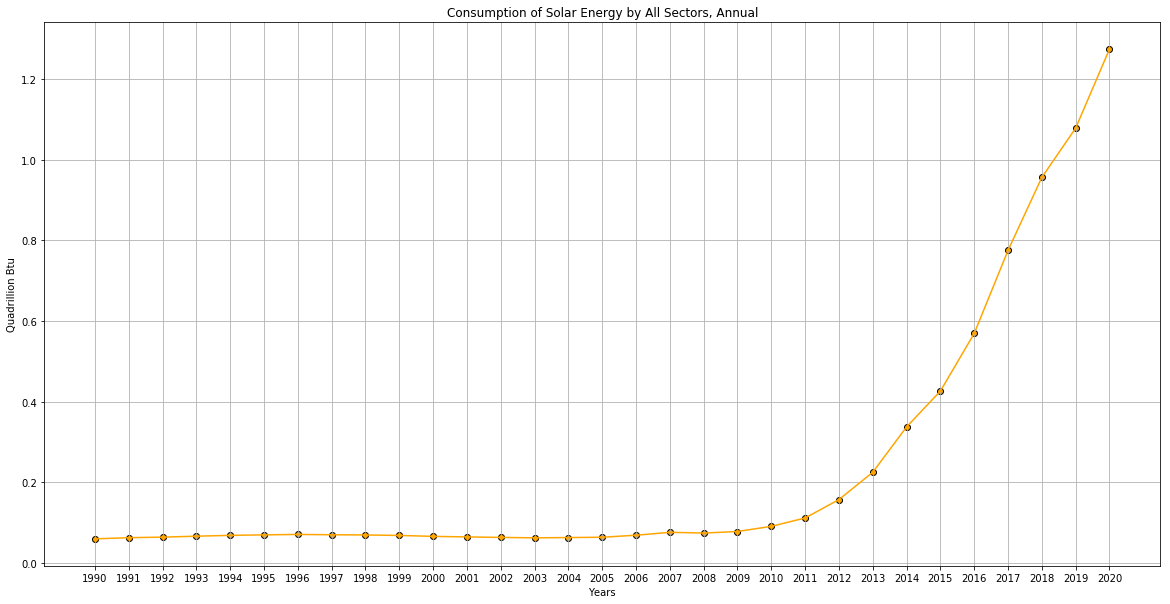

In [73]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
plt.figure(figsize=(20,10))
# # Create a visual for the data
plt.scatter(years, solar, color="orange", edgecolors="black")
plt.plot(years, solar, color="orange")
plt.title("Consumption of Solar Energy by All Sectors, Annual")
plt.ylabel("Quadrillion Btu")
plt.xlabel("Years")
plt.grid(True)

plt.show()

In [74]:
# Electric Power Sector Large-Scale Wind Net Summer Capacity, Annual
wind_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNTCBUS.A"

In [75]:
print(requests.get(wind_url))

<Response [200]>


In [76]:
response = requests.get(wind_url).json()

In [77]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [78]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
wind_consumption = []

# Loop through Solar API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    wind_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
wind = wind_consumption[::-1]

In [96]:
# Determine year to year percent change
wind_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Wind (Quads)': wind_consumption[0:31],
    '% Change': wind_consumption[0:31]
})
wind_consumption_btu_df.head()

,Years,Wind (Quads),% Change
0,1990,3.253554,3.253554
1,1991,2.891694,2.891694
2,1992,2.546014,2.546014
3,1993,2.345611,2.345611
4,1994,2.093728,2.093728


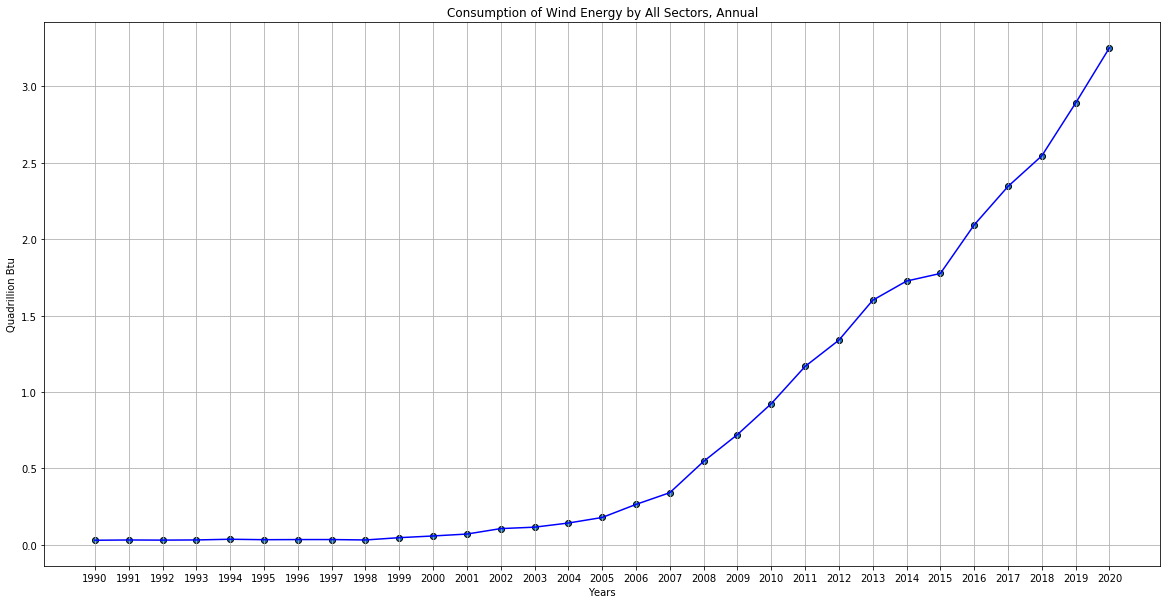

In [79]:
# Electric Power Sector Wind Net Summer Capacity, Annual
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(years, wind, edgecolors="black")
plt.plot(years,wind, color = "blue")
plt.title("Consumption of Wind Energy by All Sectors, Annual")
plt.ylabel("Quadrillion Btu")
plt.xlabel("Years")
plt.grid(True)

plt.show()

In [80]:
renewable_urls = []
renewable_consumption_btu = []
renewable_years = []
i = 0

renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GETCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOTCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNTCBUS.A")

for renewables in renewable_urls:
    renewable_response = requests.get(renewables).json()
    renewable_consumption_btu.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_years[i].append(response[0])
    renewable_consumption_btu[i] = renewable_consumption_btu[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    i += 1

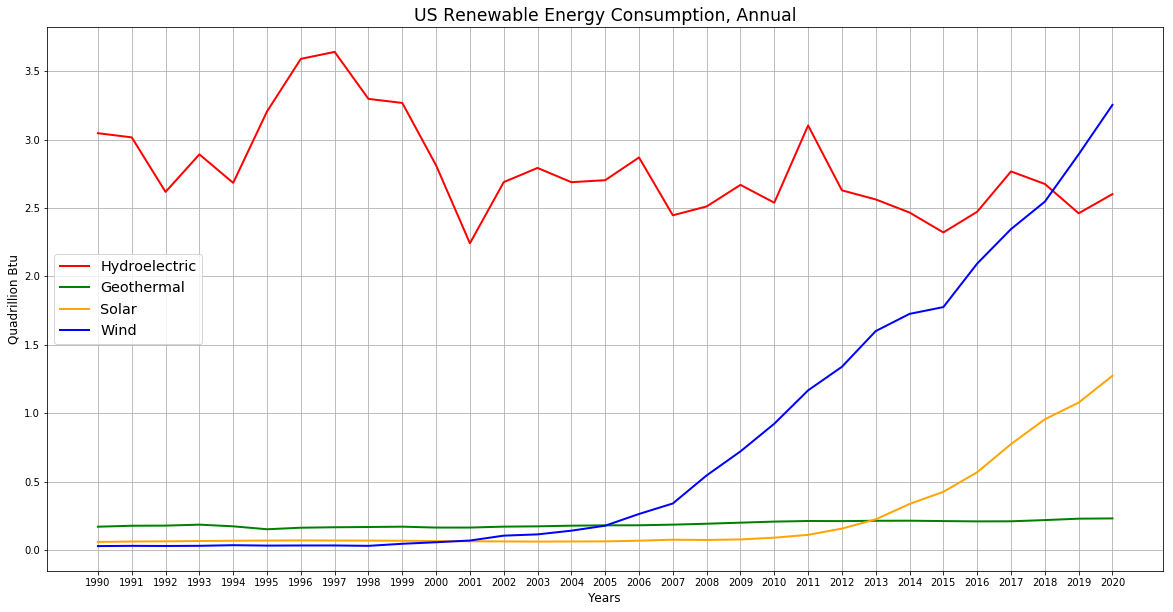

In [81]:
# US Renewable Energy Consumption
plt.figure(figsize=(20,10))

# # Create a visual for the combined data
plt.plot(years, hydroelectric, label="Hydroelectric", color="red", linewidth=2.0)
plt.plot(years, geothermal, label="Geothermal", color ="green", linewidth=2.0)
plt.plot(years, solar, label="Solar", color="orange", linewidth=2.0)
plt.plot(years, wind, label="Wind", color="blue", linewidth=2.0)
plt.title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="large")
plt.xlabel("Years", fontsize="large")
plt.legend(loc='center left', frameon=True, fancybox=True, fontsize="x-large")
plt.grid(True)

plt.show()

In [101]:
# Create Renewable Consumption DataFrame using list of dictionaries method
renewable_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Hydroelectric': hydroelectric[0:31],
    'Geothermal': geothermal[0:31],
    'Solar': solar[0:31],
    'Wind': wind[0:31],
})
# Show DataFrame
renewable_consumption_btu_df

,Years,Hydroelectric,Geothermal,Solar,Wind
0,1990,3.046391,0.170747,0.059420,0.029007
1,1991,3.015943,0.177626,0.062354,0.030796
2,1992,2.617436,0.178699,0.063676,0.029863
3,1993,2.891613,0.185673,0.066060,0.030987
4,1994,2.683457,0.173464,0.068102,0.035560
5,1995,3.205307,0.152057,0.069347,0.032630
6,1996,3.589656,0.163359,0.070417,0.033440
7,1997,3.640458,0.166698,0.069586,0.033581
8,1998,3.297054,0.168450,0.069053,0.030853
9,1999,3.267575,0.170921,0.067937,0.045894


In [102]:
renewable_consumption_btu_df.head()

,Years,Hydroelectric,Geothermal,Solar,Wind
0,1990,3.046391,0.170747,0.059420,0.029007
1,1991,3.015943,0.177626,0.062354,0.030796
2,1992,2.617436,0.178699,0.063676,0.029863
3,1993,2.891613,0.185673,0.066060,0.030987
4,1994,2.683457,0.173464,0.068102,0.035560


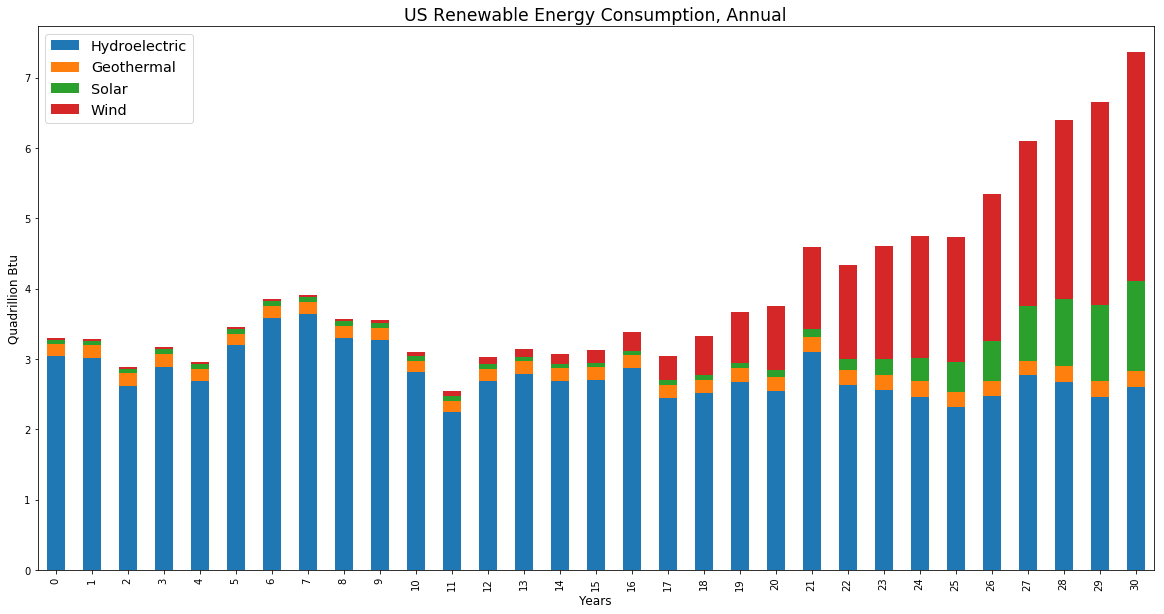

In [103]:
# renewable_consumption_df = renewable_consumption_df.set_index('renewable_years')

# Initialize variable for bar graph of consumption data
ax = renewable_consumption_btu_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'US Renewable Energy Consumption')

ax.set_title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
ax.set_ylabel("Quadrillion Btu", fontsize="large")
ax.set_xlabel("Years", fontsize="large")
ax.legend(loc='upper left', frameon=True, fancybox=True, fontsize="x-large")
ax.grid
ax

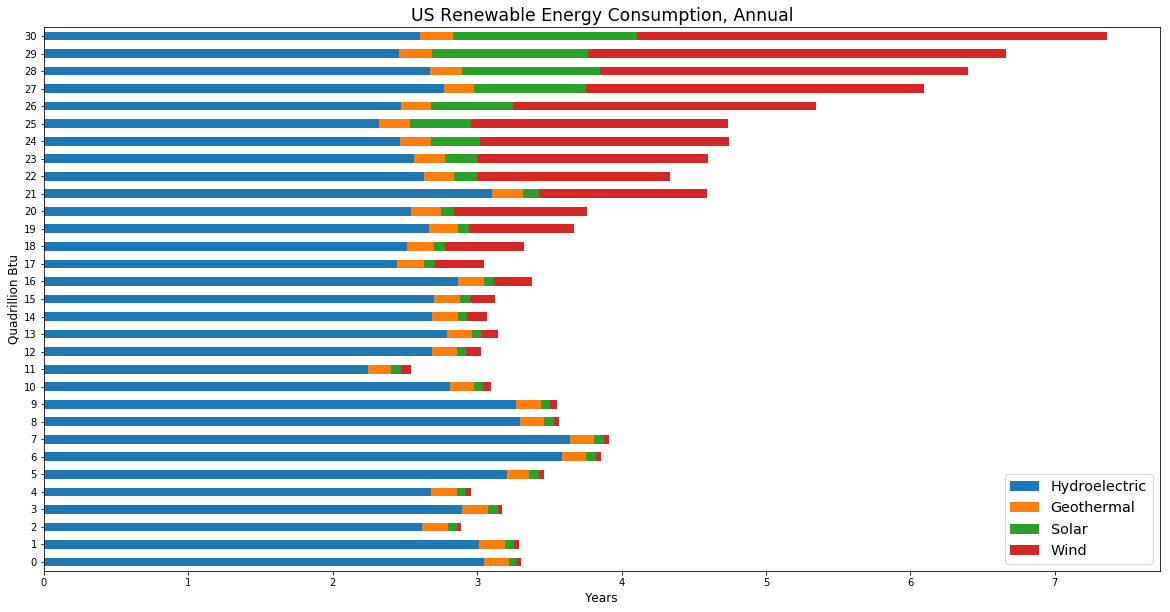

In [104]:
# Initialize variable for horizontal graph of consumption data
axh = renewable_consumption_btu_df.plot(kind='barh', stacked=True, figsize=(20,10), title = 'US Renewable Energy Consumption')

axh.set_title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
axh.set_ylabel("Quadrillion Btu", fontsize="large")
axh.set_xlabel("Years", fontsize="large")
axh.legend(loc='lower right', frameon=True, fancybox=True, fontsize="x-large")
axh.grid
axh

# for rowNum,row in renewable_consumption_df.iterrows():
#     xpos = 0
#     for val in row:
#         xpos += val
#         ax.text(xpos + 1, rowNum-0.05, str(val), color='black')
#     xpos = 0
# ax

Text(0.5, 0, 'Years')

<Figure size 432x288 with 0 Axes>

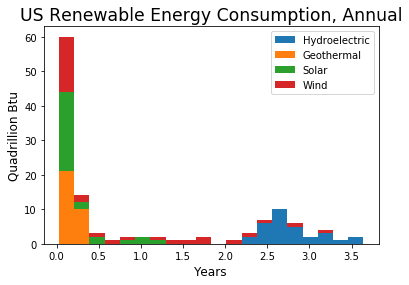

In [105]:
# Create a Histogram
plt.figure();

renewable_consumption_btu_df.plot.hist(stacked=True, bins=20)
plt.title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="large")
plt.xlabel("Years", fontsize="large")

In [ ]:
# determine year to year percentage change for energy production both fossil fuels and renewables to see if the pace of energy production has changed for either. 
# look at how energy production affects prices. 
# *Bonus: Analyze total U.S. population over the same period of time.
# Compare all of our findings together. 